In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Dataset1 - Import Export of fossil fuels in India

In [ ]:
df2=pd.read_csv('/content/drive/My Drive/open_src_files/petroleum.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
a=df2.loc[df2['Import/Export']=='LPG']
a

,Category,Import/Export,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19 (P)
1,Product Import,LPG,6301,6567,8313,8959,11097,11380,13235
14,Product Export,LPG,200,227,254,195,317,359,417


In [ ]:
a=a.drop(columns=['Category','Import/Export'])

In [ ]:
a.loc[1]

2012-13         6301
2013-14         6567
2014-15         8313
2015-16         8959
2016-17        11097
2017-18        11380
2018-19 (P)    13235
Name: 1, dtype: int64

Text(0.5, 1.0, 'Quantity vs Year')

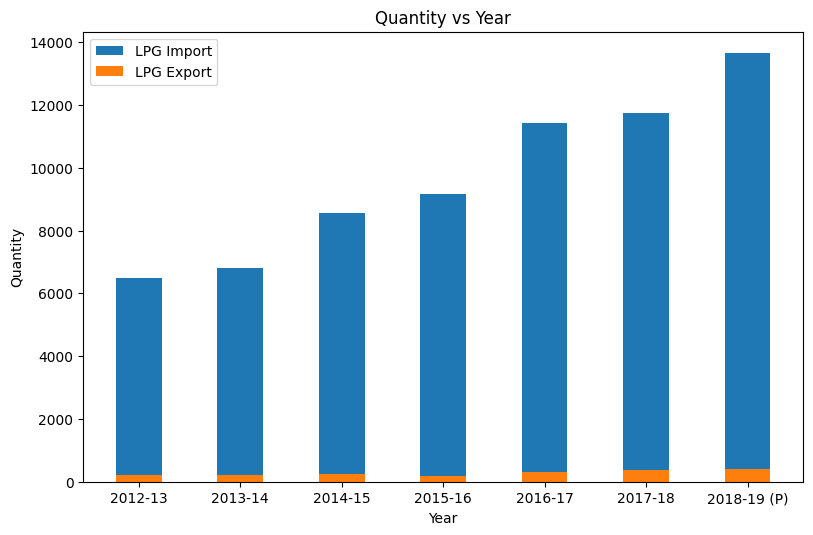

In [ ]:
fig1=plt.figure(figsize=(8,5),dpi=100)
axes1=fig1.add_axes([0.1,0.1,0.9,0.9])
plt.bar(a.columns,a.loc[1],width=0.45,label='LPG Import',bottom=a.loc[14])
plt.bar(a.columns,a.loc[14],width=0.45,label='LPG Export')
plt.legend(loc=0)
plt.ylabel('Quantity')
plt.xlabel('Year')
plt.title('Quantity vs Year')

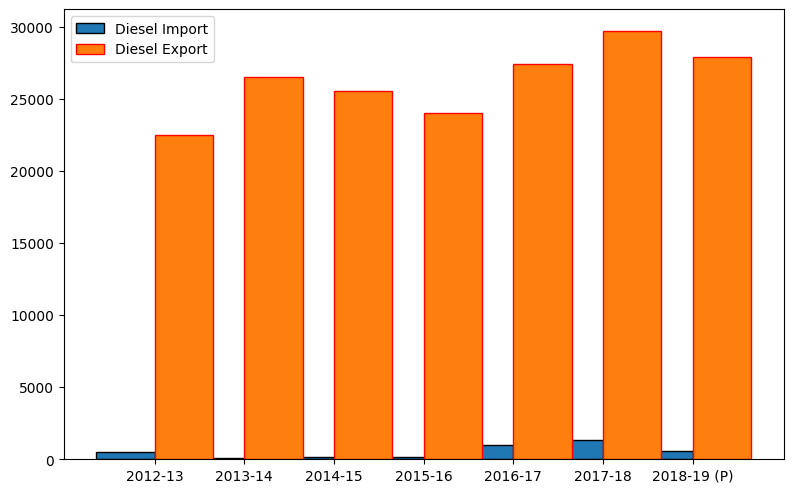

In [ ]:
fig1=plt.figure(figsize=(8,5),dpi=100)
axes1=fig1.add_axes([0.1,0.1,0.9,0.9])
b=df2.loc[df2['Import/Export']=='Diesel']
b=b.drop(columns=['Category','Import/Export'])
spc=np.arange(7)
plt.bar(spc,b.loc[6],width=0.65,label='Diesel Import',edgecolor='k')
plt.bar(spc+0.65,b.loc[19],width=0.65,label='Diesel Export',edgecolor='r')
plt.xticks(spc+0.65/2,tuple(b.columns))
plt.legend(loc=0)

##Dataset 2 - Google Stock Price Analysis

Text(0.5, 1.0, 'Prices vs Time')

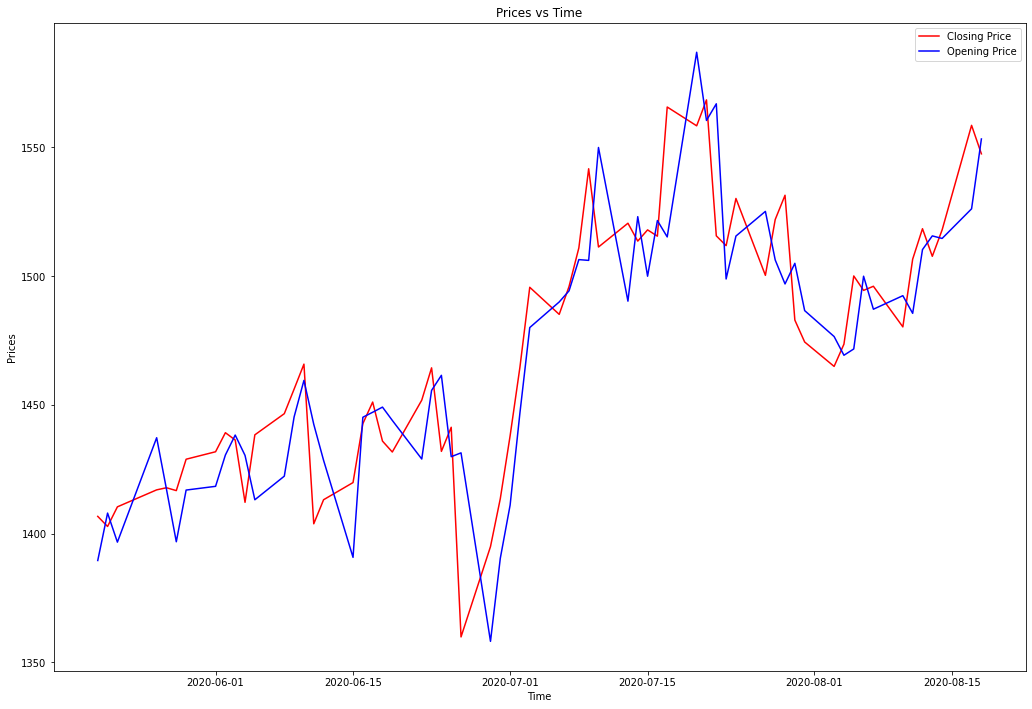

In [ ]:
import datetime
df=pd.read_csv('/content/drive/My Drive/open_src_files/google.csv')
df=df.to_numpy()
df_close=df[:,4]#closing price
df_open=df[:,1]#opening price
df_high=df[:,2]#highest price
df_low=df[:,3]#lowest price
df_vol=df[:,5]#volume of shares
holiday=[datetime.datetime(2020,5,25),datetime.datetime(2020,8,19)]
date_arr=pd.bdate_range(start='5/20/2020',end='8/19/2020',freq='C',holidays=holiday)
date_arr_np=date_arr.to_numpy()#array of dates
fig2=plt.figure(figsize=(15,10))
axes2=fig2.add_axes([0.1,0.1,0.9,0.9])
plt.plot(date_arr_np,df_close,color='red',label='Closing Price')
plt.plot(date_arr_np,df_open,color='blue',label='Opening Price')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Prices vs Time')

Text(0.5, 1.0, 'Prices vs Time')

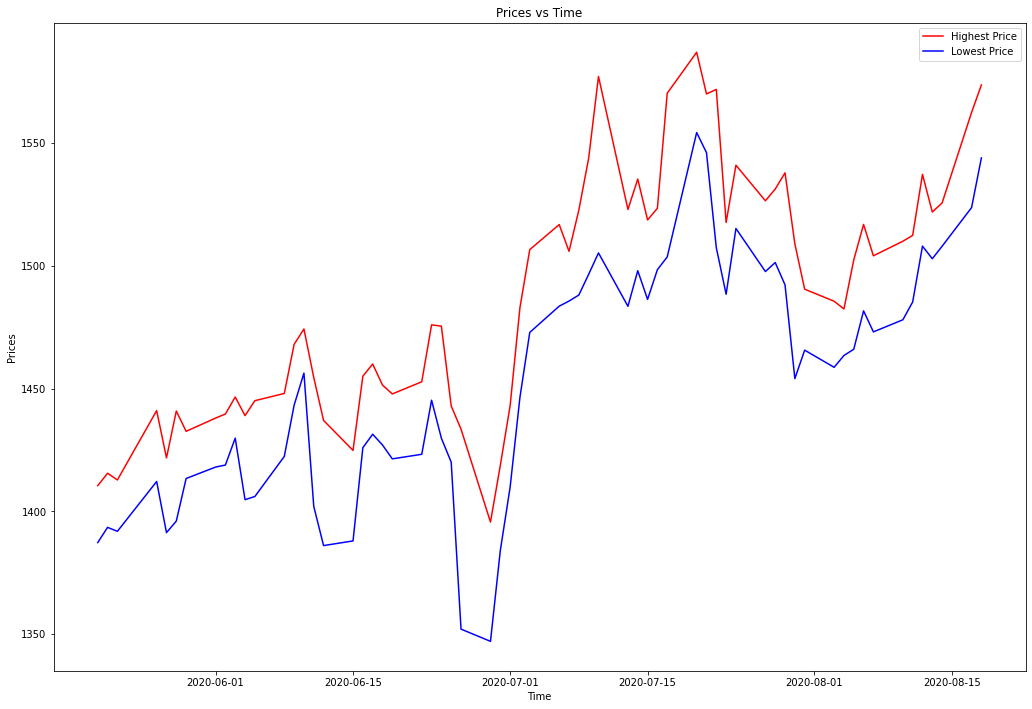

In [ ]:
fig3=plt.figure(figsize=(15,10))
axes3=fig3.add_axes([0.1,0.1,0.9,0.9])
plt.plot(date_arr_np,df_high,color='red',label='Highest Price')
plt.plot(date_arr_np,df_low,color='blue',label='Lowest Price')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Prices vs Time')

##Dataset3 - 2nd hand Car Sales Data

In [ ]:
df3=pd.read_csv('/content/drive/My Drive/open_src_files/toyota.csv',index_col=0,na_values=['??','????','?','???'])
df3=df3.dropna()

In [ ]:
df3.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1096 non-null   int64  
 1   Age        1096 non-null   float64
 2   KM         1096 non-null   float64
 3   FuelType   1096 non-null   object 
 4   HP         1096 non-null   float64
 5   MetColor   1096 non-null   float64
 6   Automatic  1096 non-null   int64  
 7   CC         1096 non-null   int64  
 8   Doors      1096 non-null   object 
 9   Weight     1096 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 94.2+ KB


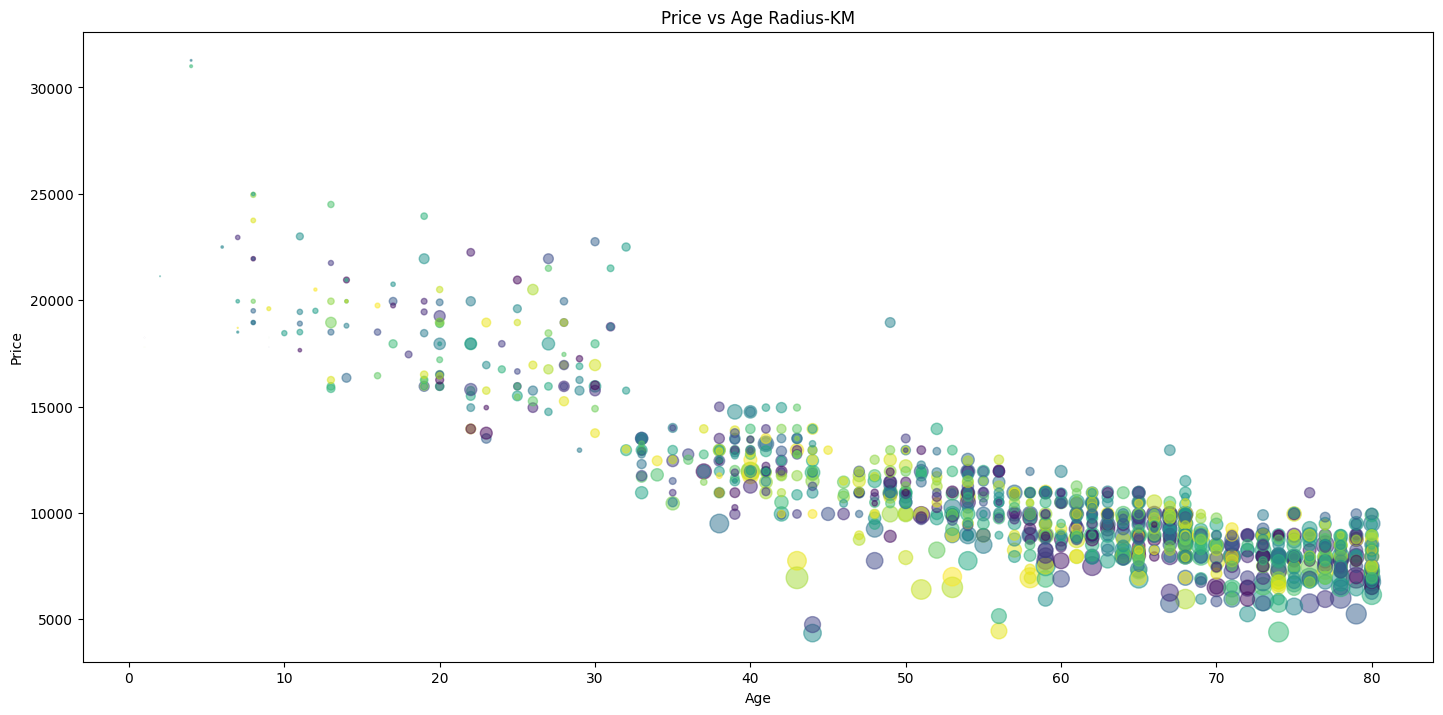

In [ ]:
df3[['Price', 'Age','KM']] = df3[['Price', 'Age','KM']].apply(pd.to_numeric)
price=np.array(df3['Price'].values)
age=np.array(df3['Age'].values)
km=np.array(df3['KM'].values)
km=km/1000
color_arr = np.random.rand(1096)
fig3=plt.figure(figsize=(15,7),dpi=100)
axes3=fig3.add_axes([0.1,0.1,0.9,0.9])
plt.title('Price vs Age Radius-KM')
plt.xlabel('Age')
plt.ylabel('Price')
plt.scatter(age,price,s=km,c=color_arr,alpha=0.5)